Dataset Description
Описание датасета

В датасете представлены картинки и соответствующие им классы

Структура файлов:

Папка trainval
Содержит изображения для обучения модели в формате trainval_000001.jpg, trainval_000002.jpg и т.д.

Папка test
Содержит изображения для подсчета скора в соревновании в формате test_000001.jpg, test_000002.jpg и так далее.

Файл trainval.csv
CSV-файл, содержащий информацию о файлах и их классах.

Id: имя файла изображения (например, trainval_000001.jpg).
Category: категория (метка класса), соответствующая изображению.
Пример строки в CSV-файле:
```
Id,Category
trainval_000001.jpg,3
trainval_000002.jpg,7
```

Все файлы находятся по пути dataset/...

dataset/trainval/trainval_000001.jpg (90 000 файлов)
dataset/test/test_000001.jpg (10 000 файлов)
dataset/trainval.csv

file dataset/test/test_000000.jpg
dataset/test/test_000000.jpg: JPEG image data, JFIF standard 1.01, aspect ratio, density 1x1, segment length 16, baseline, precision 8, 40x40, components 3

In [1]:
import pandas as pd
csv_path = "dataset/trainval.csv"
df = pd.read_csv(csv_path)

Category
116    468
37     467
43     466
156    465
194    464
      ... 
183    435
21     435
163    433
38     433
13     428
Name: count, Length: 200, dtype: int64

count    200.000000
mean     450.000000
std        7.301132
min      428.000000
25%      445.000000
50%      450.500000
75%      455.000000
max      468.000000
Name: count, dtype: float64

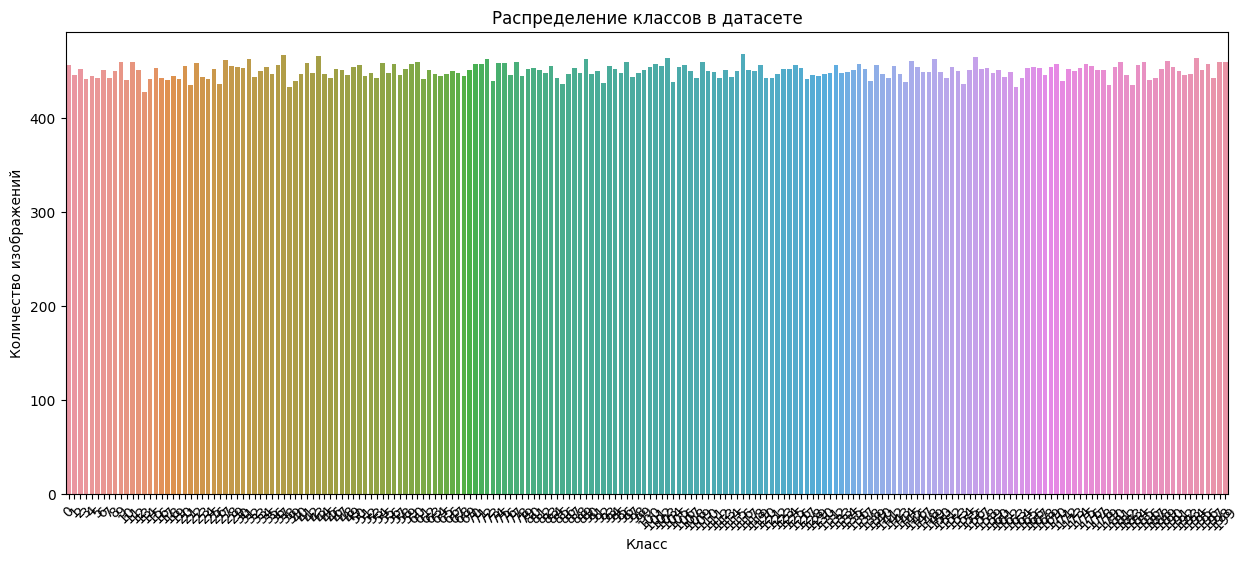

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

class_distribution = df["Category"].value_counts()
display(class_distribution)
display(class_distribution.describe())
plt.figure(figsize=(15, 6))
sns.barplot(x=class_distribution.index, y=class_distribution.values)
plt.title('Распределение классов в датасете')
plt.xlabel('Класс')
plt.ylabel('Количество изображений')
plt.xticks(rotation=45)
plt.show()

Анализ изображений: 100%|██████████| 1000/1000 [00:00<00:00, 2849.20it/s]



Анализ изображений:
Уникальные размеры: {(40, 40)}
Количество каналов: {3}


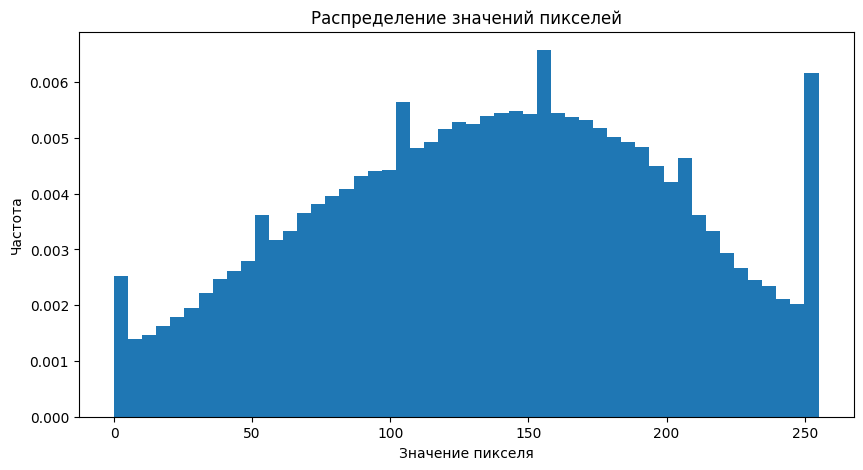

In [3]:
from pathlib import Path
from tqdm import tqdm
import numpy as np
import cv2


def analyze_image_properties(images_dir, num_samples=1000):
    image_files = list(Path(images_dir).glob('*.jpg'))
    if len(image_files) > num_samples:
        image_files = np.random.choice(image_files, num_samples, replace=False)
    
    sizes = []
    channels = []
    pixel_values = []
    
    for img_path in tqdm(image_files, desc="Анализ изображений"):
        img = cv2.imread(str(img_path))
        if img is not None:
            sizes.append(img.shape[:2])
            channels.append(img.shape[2])
            pixel_values.extend(img.ravel())
    
    print("\nАнализ изображений:")
    print(f"Уникальные размеры: {set(sizes)}")
    print(f"Количество каналов: {set(channels)}")
    
    plt.figure(figsize=(10, 5))
    plt.hist(pixel_values, bins=50, density=True)
    plt.title('Распределение значений пикселей')
    plt.xlabel('Значение пикселя')
    plt.ylabel('Частота')
    plt.show()



train_images_dir = 'dataset/trainval'
analyze_image_properties(train_images_dir)


In [4]:
import os


def visualize_sample_images(df, images_dir, num_samples=5):
    unique_classes = df['Category'].unique()
    unique_classes.sort()
    print(f"unique_classes: {unique_classes}")
    print(f"unique_classes size: {len(unique_classes)}")
    
    plt.figure(figsize=(15, len(unique_classes) * 2))
    for i, class_label in enumerate(unique_classes):
        class_images = df[df['Category'] == class_label]['Id'].sample(num_samples)
        
        for j, img_name in enumerate(class_images):
            img_path = os.path.join(images_dir, img_name)
            img = cv2.imread(img_path)
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            
            plt.subplot(len(unique_classes), num_samples, i * num_samples + j + 1)
            plt.imshow(img)
            plt.axis('off')
            if j == 0:
                plt.title(f'Class {class_label}')
    
    plt.tight_layout()
    plt.show()

# visualize_sample_images(df, train_images_dir),
